In [30]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
from statsmodels.tsa.arima.model import ARIMA,SARIMAXSpecification
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\dai\Downloads\Assigement2_data\Train_SU63ISt.csv",index_col=0)
df.isnull().sum()

Datetime    0
Count       0
dtype: int64

In [3]:
df.head()

,Datetime,Count
ID,,
0,25-08-2012 00:00,8
1,25-08-2012 01:00,2
2,25-08-2012 02:00,6
3,25-08-2012 03:00,2
4,25-08-2012 04:00,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18288 entries, 0 to 18287
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  18288 non-null  object
 1   Count     18288 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 428.6+ KB


In [5]:
df['Datetime']=pd.to_datetime(df['Datetime'],format='mixed')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18288 entries, 0 to 18287
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  18288 non-null  datetime64[ns]
 1   Count     18288 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 428.6 KB


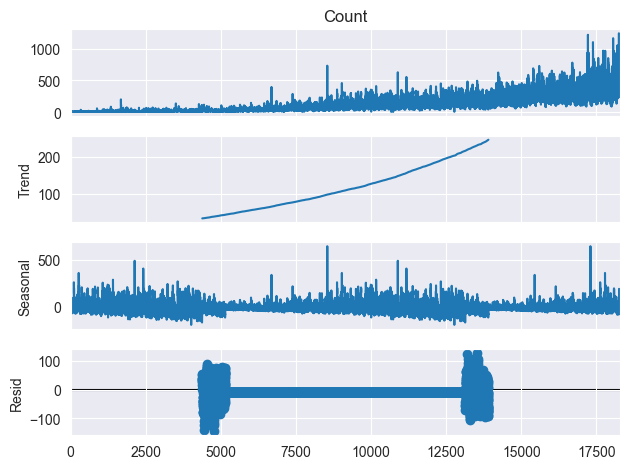

In [7]:
result=seasonal_decompose(df['Count'],model='additive',period=(365*24))
result.plot()
plt.show()

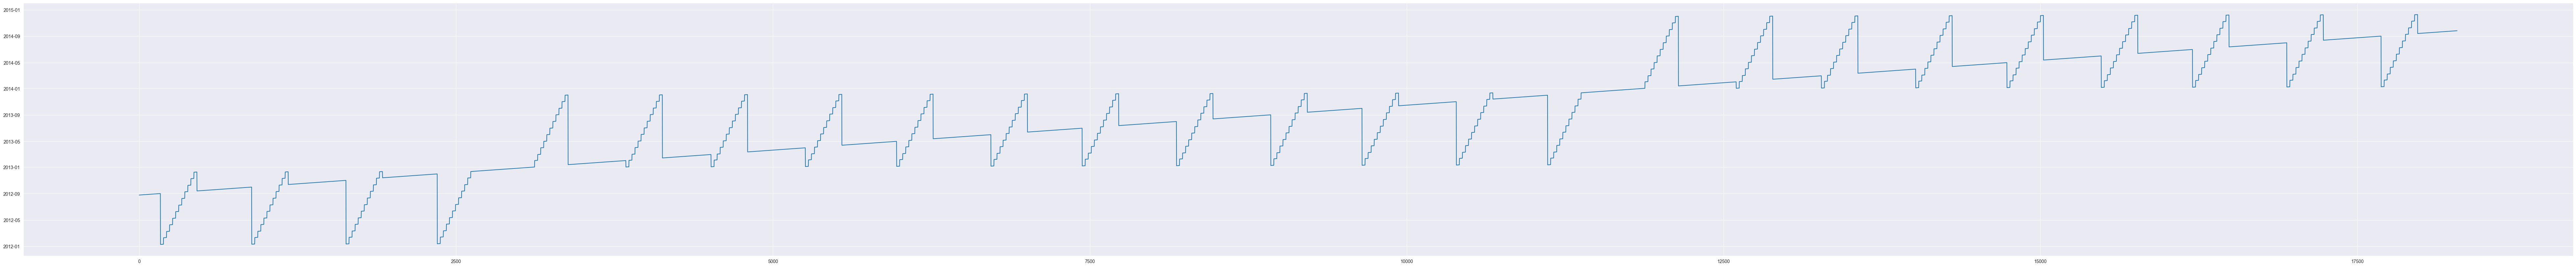

In [8]:
plt.figure(figsize=(100,10))
plt.plot(df['Datetime'])
plt.show()

In [10]:
df['Count']=df['Count'].astype(int)
train_size=int(len(df)*0.80)
train=df.iloc[:train_size,:]
test=df.iloc[train_size:,:]

## Rolling Mean

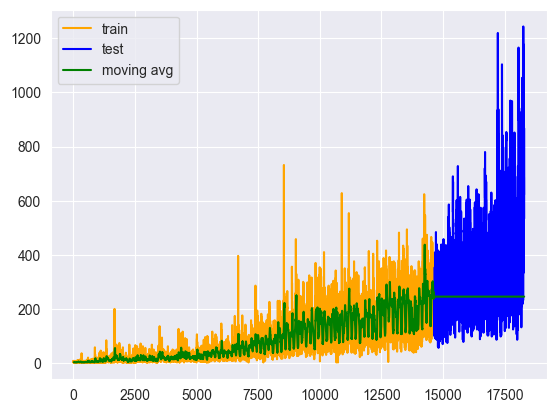

In [22]:
span=24
fcast=train['Count'].rolling(window=span).mean()
Ma=fcast.iloc[-1]
Ma_series=pd.Series(Ma.repeat(len(test)))
Ma_fcast=pd.concat([fcast,Ma_series],ignore_index=True)
plt.plot(train['Count'],label='train',color='orange')
plt.plot(test["Count"],label='test',color='b')
plt.plot(Ma_fcast,label='moving avg',color='green')
# plt.title(f"RMSE:{root_mean_squared_error(test,Ma_series):.2f}")
plt.legend(loc='best')
plt.show()

## Simple Exponential Smoothing

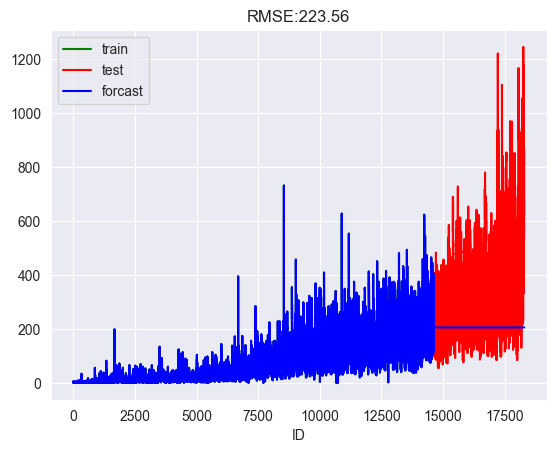

In [45]:
alpha=0.5
ses=SimpleExpSmoothing(train['Count'])
fit1=ses.fit(smoothing_level=alpha)
fcast=fit1.forecast(len(test))
fcast_series=pd.concat([train['Count'],fcast],ignore_index=True)
# # fcast.index=test['Count'].index
train['Count'].plot(color='green',label='train')
test['Count'].plot(color='red',label='test')
fcast_series.plot(color='blue',label='forcast')
plt.axis()
rmse=root_mean_squared_error(test['Count'],fcast)
plt.title(f'RMSE:{rmse:.2f}')
plt.legend(loc='best')
plt.show()


## Hot Linear

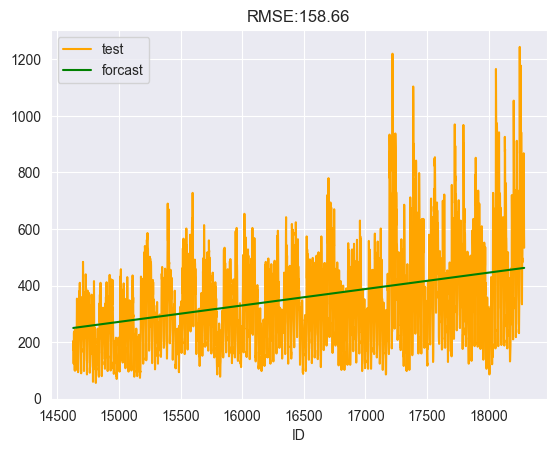

In [34]:
holt=Holt(train['Count'])
fit=holt.fit(smoothing_level=0.0062,smoothing_trend=0.002)
fcast=fit.forecast(len(test))
test['Count'].plot(color='orange',label='test')
fcast.plot(color='green',label='forcast')
rmse=root_mean_squared_error(test['Count'],fcast)
plt.title(f'RMSE:{rmse:.2f}')
plt.legend(loc='best')
plt.show()

## Holt Exponential

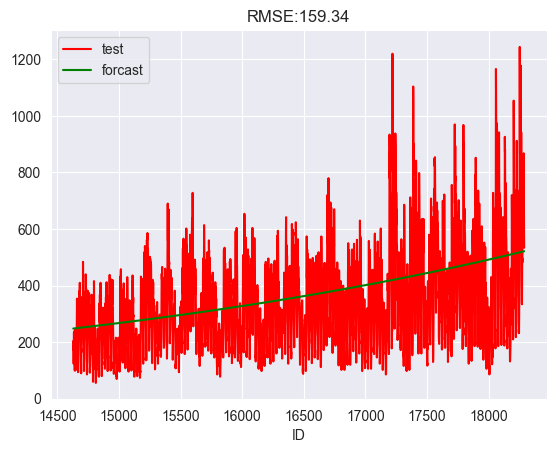

In [48]:
holt=Holt(train['Count'],exponential=True,damped_trend=False)
fit=holt.fit(smoothing_trend=0.001,smoothing_level=0.0062)
fcast=fit.forecast(len(test))
test['Count'].plot(color='red',label='test')
fcast.plot(color='green',label='forcast')
rmse=root_mean_squared_error(test['Count'],fcast)
plt.title(f'RMSE:{rmse:.2f}')
plt.legend(loc='best')
plt.show()

## Hot Winters

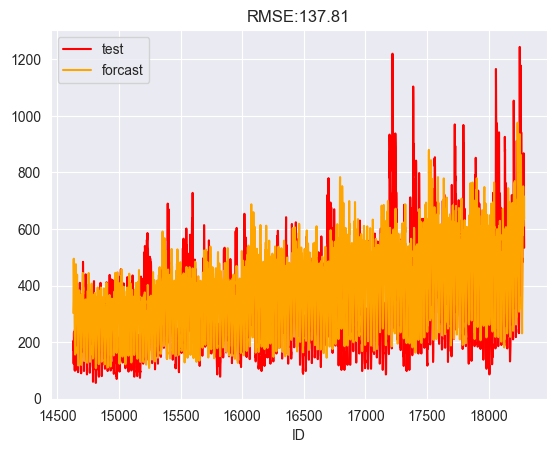

In [51]:
from statsmodels.tsa.api import Holt,ExponentialSmoothing

hw=ExponentialSmoothing(train['Count'],trend='add',seasonal='mul',seasonal_periods=720)
fit=hw.fit(smoothing_level=0.016,smoothing_trend=0.003,smoothing_seasonal=0.1)
fcast=fit.forecast(len(test))
test['Count'].plot(color='red',label='test')
fcast.plot(color='orange',label='forcast')
rmse=root_mean_squared_error(test['Count'],fcast)
plt.title(f'RMSE:{rmse:.2f}')
plt.legend(loc='best')
plt.show()

## ACF,PACF

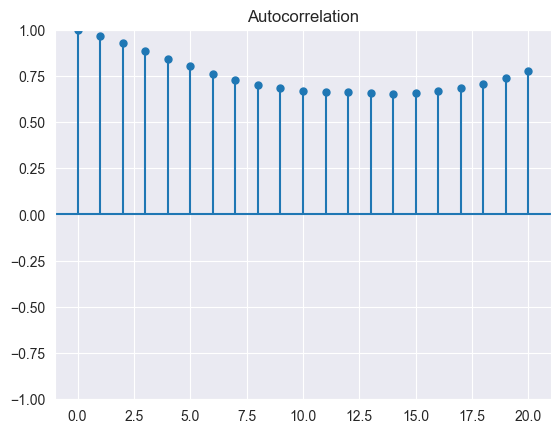

In [56]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(df['Count'],lags=20,alpha=None)
plt.show()

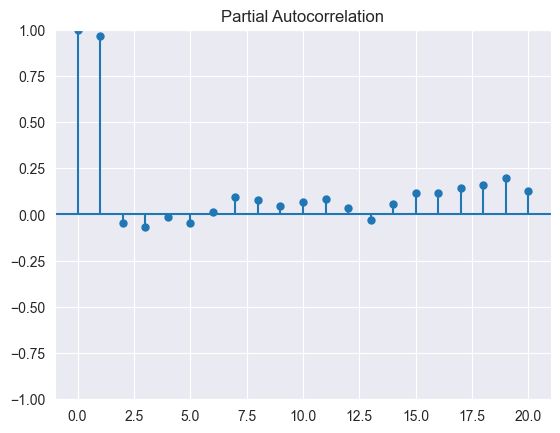

In [57]:
plot_pacf(df['Count'],lags=20,alpha=None)
plt.show()

## Arima

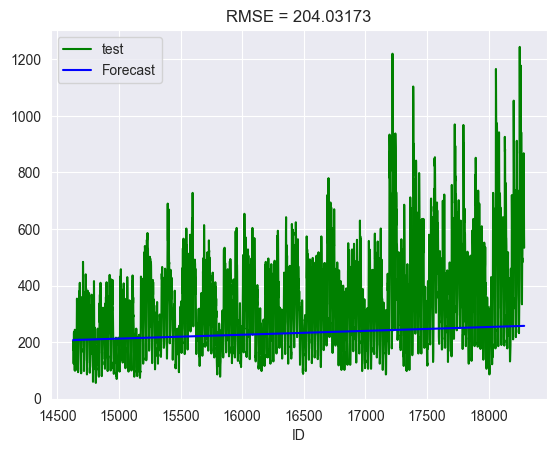

In [62]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(train['Count'],order=(3,2,3))
model_fit=model.fit()
pred=model_fit.predict(start=len(train),end=len(train)+len(test)-1)
test['Count'].plot(color='green',label='test')
pred.plot(color='blue', label='Forecast')
rmse = root_mean_squared_error(test["Count"], pred)
plt.title(f"RMSE = {rmse:.5f}")
plt.legend()
plt.show()

## Best smoothing is with Holt-Winters, RMSE: 139.81